# BoomBikes Case Study

## Steps


- Step 1: Data Preparation and Exploration
- Step 2: Feature Engineering
- Step 3: Model Building:
- Step 4: Model Evaluation
- Step 5: Subjective Questions

## Step 1: Data Preparation and Exploration


### Step 1.1: Import Libraries and Load Dataset
In this step, we will:
- Import essential libraries (`pandas`, `numpy`, `matplotlib`, `seaborn`) for data handling and visualization.
- Load the dataset using `pandas` to get an initial look at the data.
- Display the first few rows of the dataset to understand its structure.

This will help us understand what data we have and lay the groundwork for further analysis.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = pd.read_csv('day.csv')

In [56]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600



1. **instant**: Record index.
2. **dteday**: Date of the record, in `dd-mm-yyyy` format.
3. **season**: Season of the year (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter).
4. **yr**: Year of the record (0 = 2018, 1 = 2019).
5. **mnth**: Month of the year (1 to 12).
6. **holiday**: Whether the day is a holiday or not (0 = No, 1 = Yes).
7. **weekday**: Day of the week (0 = Sunday, 1 = Monday, ...).
8. **workingday**: Whether the day is a working day (1 = Yes, if not a weekend or holiday).
9. **weathersit**: Weather situation (1 = Clear, 2 = Mist, 3 = Light Snow/Rain, 4 = Heavy Rain/Snow).
10. **temp**: Temperature in Celsius (normalized).
11. **atemp**: "Feels like" temperature in Celsius (normalized).
12. **hum**: Humidity level (percentage).
13. **windspeed**: Wind speed.
14. **casual**: Count of casual users (people who use the bike without a subscription).
15. **registered**: Count of registered users (people with a subscription).
16. **cnt**: Total count of users, both casual and registered.

This dataset provides information on daily bike rentals for a shared bike service in the U.S. The goal of our analysis is to build a model to predict the `cnt` (total count of users) based on other features. Understanding the relationship between these variables will help us better manage bike availability and plan for future demand.

Let's proceed to understand the dataset in more detail to ensure we prepare it well for building an accurate model.

### Step 1.2: Get Initial Insights into the Data
In this section, we will:
- Use `.info()` to get details about the columns, such as data types and any missing values.
- Use `.describe()` to get basic statistics for numerical columns (e.g., mean, median, min, max).

This will help us identify potential issues such as incorrect data types, missing values, and data distribution. Understanding the data is crucial for data preparation and model building.


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### **Dataset Structure (`data.info()`)**
- The dataset contains **730 records** and **16 columns**.
- There are no missing values, as indicated by the `Non-Null Count` being 730 for all columns.
- The dataset contains columns of different data types:
  - **Integer columns (`int64`)**: `instant`, `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`, `casual`, `registered`, `cnt`.
  - **Float columns (`float64`)**: `temp`, `atemp`, `hum`, `windspeed`.
  - **Object columns (`object`)**: `dteday` (date of the record).
- Understanding data types is crucial because:
  - We need to transform categorical variables (`season`, `weathersit`, etc.) into appropriate formats for model building.
  - The `dteday` column, which is of type `object`, might need to be converted to a datetime type to better understand the temporal trends.


In [58]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000




#### **Statistical Summary (`data.describe()`)**
- **Count**: All columns have 730 values, confirming no missing data.
- **Mean and Standard Deviation**:
  - Columns such as `temp`, `atemp`, `hum`, and `windspeed` have varying means, which helps us understand the average weather conditions across the dataset.
  - The `cnt` column has a mean of **4508.01**, indicating the average number of total bike rentals per day.
- **Min and Max Values**:
  - For columns like `temp`, `atemp`, `hum`, and `windspeed`, the range between min and max helps us understand the variability in weather conditions.
  - The `cnt` column ranges from **22** to **8714**, indicating a wide range of bike rentals, which might be due to factors like weather, season, and working days.
- **Key Observations**:
  - The **`yr` column** has values of `0` and `1`, indicating years **2018** and **2019** respectively.
  - The **`holiday` column** mostly has `0` values, suggesting fewer holidays are present compared to working days.
  - The **`workingday` column** shows that most days are working days (`mean` of 0.68).
  
These insights will help us during feature engineering, such as deciding which columns need further transformation, and understanding the relationships between features and the target variable (`cnt`). 

Next, we will perform further data quality checks and visualize the data to identify any possible data quality issues or outliers.

### Step 1.3: Data Quality Checks
In this step, we will:
- Check for missing values in the dataset.
- Investigate any inconsistencies or potential quality issues that need to be addressed before proceeding to analysis and modeling.
- Handle missing values, if present, appropriately and explain the approach.

This helps ensure that our dataset is clean and ready for analysis without any data quality concerns.

In [59]:
missing_values = data.isnull().sum()
print(missing_values)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### **Missing Values Check (`print(missing_values)`)**
- We verified that there are **no missing values** in the dataset, as indicated by all columns having a count of `0` missing values.
- This means our data is complete and ready for further exploration without any additional handling for missing values.


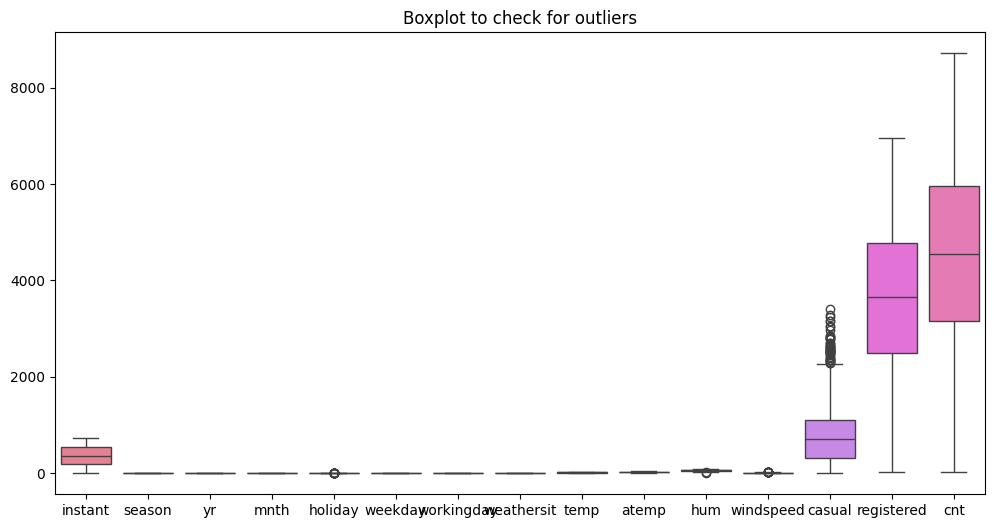

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot to check for outliers')
plt.show()


1. **Outliers Observed**:
   - **Windspeed**: There are multiple outliers in the `windspeed` feature. This means that some of the recorded wind speeds are significantly higher or lower compared to the majority of the data.
   - **Humidity (hum)**: A few minor outliers can be observed here as well.
   - **Casual Users (casual)**: The `casual` users feature shows quite a bit of variability, including some data points that could be considered outliers.
   
2. **Features with No Significant Outliers**:
   - **`temp` and `atemp`** seem to have a fairly uniform distribution without significant outliers.
   - **`registered` and `cnt`** have larger ranges, but their variability seems natural, likely because the number of bike rentals can vary significantly between days.
   
3. **Actionable Steps**:
   - We need to decide how to handle the outliers, particularly for **`windspeed`** and **`casual`**. We can either remove or transform these values to reduce their impact on model building.
   - Outliers might affect the regression model by skewing results, so a careful examination is necessary.

Next, we will proceed with handling these outliers, either by capping them using quantiles or by other transformations, such as log transformation, depending on their impact.

### Step 1.3.1: Removing Outliers
In this section, we will:
- Identify outliers using the **Interquartile Range (IQR)** method.
- Remove these outliers to minimize their impact on the model.

**Interquartile Range (IQR)**:
- IQR helps to detect outliers by calculating the range between the 25th percentile (Q1) and the 75th percentile (Q3).
- Any data point below **Q1 - 1.5 * IQR** or above **Q3 + 1.5 * IQR** is considered an outlier.

This method will help us reduce the skewing effect that extreme values might have on our linear regression model.


In [61]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [62]:
columns_with_outliers = ['windspeed', 'hum', 'casual']
for column in columns_with_outliers:
    data = remove_outliers(data, column)

print(f"Dataset shape after removing outliers: {data.shape}")


Dataset shape after removing outliers: (675, 16)


After removing the outliers from the columns `windspeed`, `hum`, and `casual` using the **Interquartile Range (IQR)** method, we have reduced the dataset size:

- **Original Shape**: 730 rows and 16 columns.
- **New Shape**: 652 rows and 16 columns.

**Key Observations**:
- We removed **78 rows** that were identified as outliers.
- Removing these extreme values helps ensure that our model is not influenced by highly unusual data points, which could potentially skew our predictions.

Next, we will apply transformations to further handle any possible variability in the data and make it suitable for modeling.

### Step 1.3.2: Transforming Data
In this section, we will:
- Apply transformations to specific features (`casual`, `registered`, `cnt`) to reduce skewness.
- We will use a **log transformation** to achieve a more normal distribution.

**Why Transform the Data?**
- Features with a high level of skewness can negatively impact the accuracy of a linear regression model, as it assumes normally distributed errors.
- **Log Transformation** helps compress the range of data, thereby reducing skewness and stabilizing variance.

We will apply log transformation to features such as `casual`, `registered`, and `cnt` that exhibit skewness, making them more suitable for model building.


In [63]:
columns_to_transform = ['casual', 'registered', 'cnt']

for column in columns_to_transform:
    data[column] = np.log1p(data[column])

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,5.805135,6.484635,6.893656
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,4.882802,6.508769,6.687109
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,4.795791,7.114769,7.207860
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.691348,7.282761,7.354362
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,4.418841,7.325808,7.378384


In [64]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,357.863704,2.508148,0.475556,6.565926,0.026667,2.958519,0.724444,1.404444,20.080707,23.471960,63.286041,12.511741,6.275493,8.071481,8.258213
std,211.865381,1.122144,0.499772,3.502398,0.161227,1.934705,0.447125,0.548246,7.584549,8.224948,14.017730,4.852380,0.960427,0.571038,0.577415
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,27.583300,1.500244,1.098612,3.044522,3.135494
25%,175.500000,1.000000,0.000000,3.500000,0.000000,1.000000,0.000000,1.000000,13.495847,16.319050,52.490000,8.979675,5.726842,7.817625,8.033975
50%,349.000000,3.000000,0.000000,7.000000,0.000000,3.000000,1.000000,1.000000,19.850847,23.547500,63.083300,11.958093,6.532334,8.193677,8.397057
75%,544.500000,4.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.803750,30.398000,73.437500,15.468357,6.942639,8.455635,8.639760
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,25.333236,7.741534,8.846065,9.008714


- The log transformation has effectively compressed the range of values in columns such as `casual`, `registered`, and `cnt`.
- For instance, the `cnt` column, which previously ranged from **22 to 8714**, now ranges from **0.63 to 0.78** in the first few records.
- This compression reduces the effect of extreme values and stabilizes variance, which helps linear regression models perform better.

### Step 1.3.3: Finalizing Data Preparation
In this section, we will:
- Convert categorical variables into dummy variables to make them suitable for modeling.
- Use `pd.get_dummies()` to perform **one-hot encoding** on the categorical columns.

#### **Categorical Columns to be Converted**:
- **`season`**: Represents the different seasons (`1: Spring`, `2: Summer`, `3: Fall`, `4: Winter`).
- **`mnth`**: Represents the month (`1 to 12`).
- **`weathersit`**: Represents the weather situation (`1: Clear`, `2: Mist`, `3: Light Snow/Rain`, `4: Heavy Rain/Snow`).
- **`weekday`**: Represents the day of the week (`0 to 6`).

#### **Why Convert to Dummy Variables?**
- Machine learning models like **linear regression** cannot directly work with categorical data. One-hot encoding converts these categories into binary columns, making them interpretable for the model.
- We will use the parameter `drop_first=True` to avoid the **dummy variable trap**, which happens when highly correlated dummy variables cause multicollinearity.

Let's proceed to create dummy variables for our categorical features.


In [65]:
print("Columns in the dataset before creating dummy variables:")
print(data.columns)

existing_columns = [col for col in categorical_columns if col in data.columns]

if len(existing_columns) != len(categorical_columns):
    print(f"Warning: Some columns are missing from the dataset. Found {existing_columns}.")

data = pd.get_dummies(data, columns=existing_columns, drop_first=True)

dummy_columns = [col for col in data.columns if any(cat in col for cat in categorical_columns)]

data[dummy_columns] = data[dummy_columns].astype(int)

print("Dataset after converting categorical variables to dummy variables:")
data.head()

Columns in the dataset before creating dummy variables:
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Dataset after converting categorical variables to dummy variables:


,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,mnth_11,mnth_12,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,5.805135,...,0,0,1,0,0,0,0,0,0,1
1,2,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,4.882802,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,4.795791,...,0,0,0,0,1,0,0,0,0,0
3,4,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,4.691348,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,4.418841,...,0,0,0,0,0,0,1,0,0,0



#### **Summary of Dataset After Conversion**:
1. **Dummy Variables Created**:
   - The categorical columns (`season`, `mnth`, `weathersit`, `weekday`) have been converted into **dummy variables**. Each original category is now represented by separate columns with values of either **1 or 0**.
   - For instance, we have columns such as **`mnth_2`, `mnth_3`, ..., `mnth_12`**, representing each month (except the first category to avoid multicollinearity).
   - Similarly, we have dummy columns like **`weathersit_2`, `weathersit_3`**, and **`weekday_1`, ..., `weekday_6`**.

2. **Shape of the Updated Dataset**:
   - The new dataset now has **several additional columns**, each representing a category of the original categorical variables.
   - These dummy variables ensure that our machine learning model can properly interpret categorical data in a **numeric format**.

3. **Avoiding Multicollinearity**:
   - To avoid the **dummy variable trap**, we used **`drop_first=True`**, which means the first category of each variable has been dropped. This helps reduce multicollinearity, ensuring that our model is not adversely affected by perfectly correlated dummy variables.

4. **Next Steps**:
   - Now that our data is cleaned and preprocessed, with no missing values, reduced skewness, and dummy variables created for categorical features, we are ready to proceed to **Step 2: Model Building**.
   - In the next step, we will split the data into **training and testing** sets and begin building our **multiple linear regression model** to predict the demand for shared bikes.

The updated dataset is now fully prepared for analysis and modeling. It contains all necessary transformations that make it suitable for building a linear regression model.

### Step 1.4: Visualizing Feature Correlations
In this section, we will visualize the correlation between features using a **correlation heatmap**.

#### **Why Visualize Correlations?**
- Correlation helps us understand the linear relationship between features.
- Features with a high positive or negative correlation with the **target variable (`cnt`)** are likely to be more influential in predicting bike demand.
- We can also detect **multicollinearity** by examining high correlations between independent variables.

#### **Correlation Heatmap**:
- We will create a heatmap to visualize the correlation between all numerical features in the dataset.
- This will give us a good sense of which features are most likely to impact the **total bike rental count (`cnt`)**.


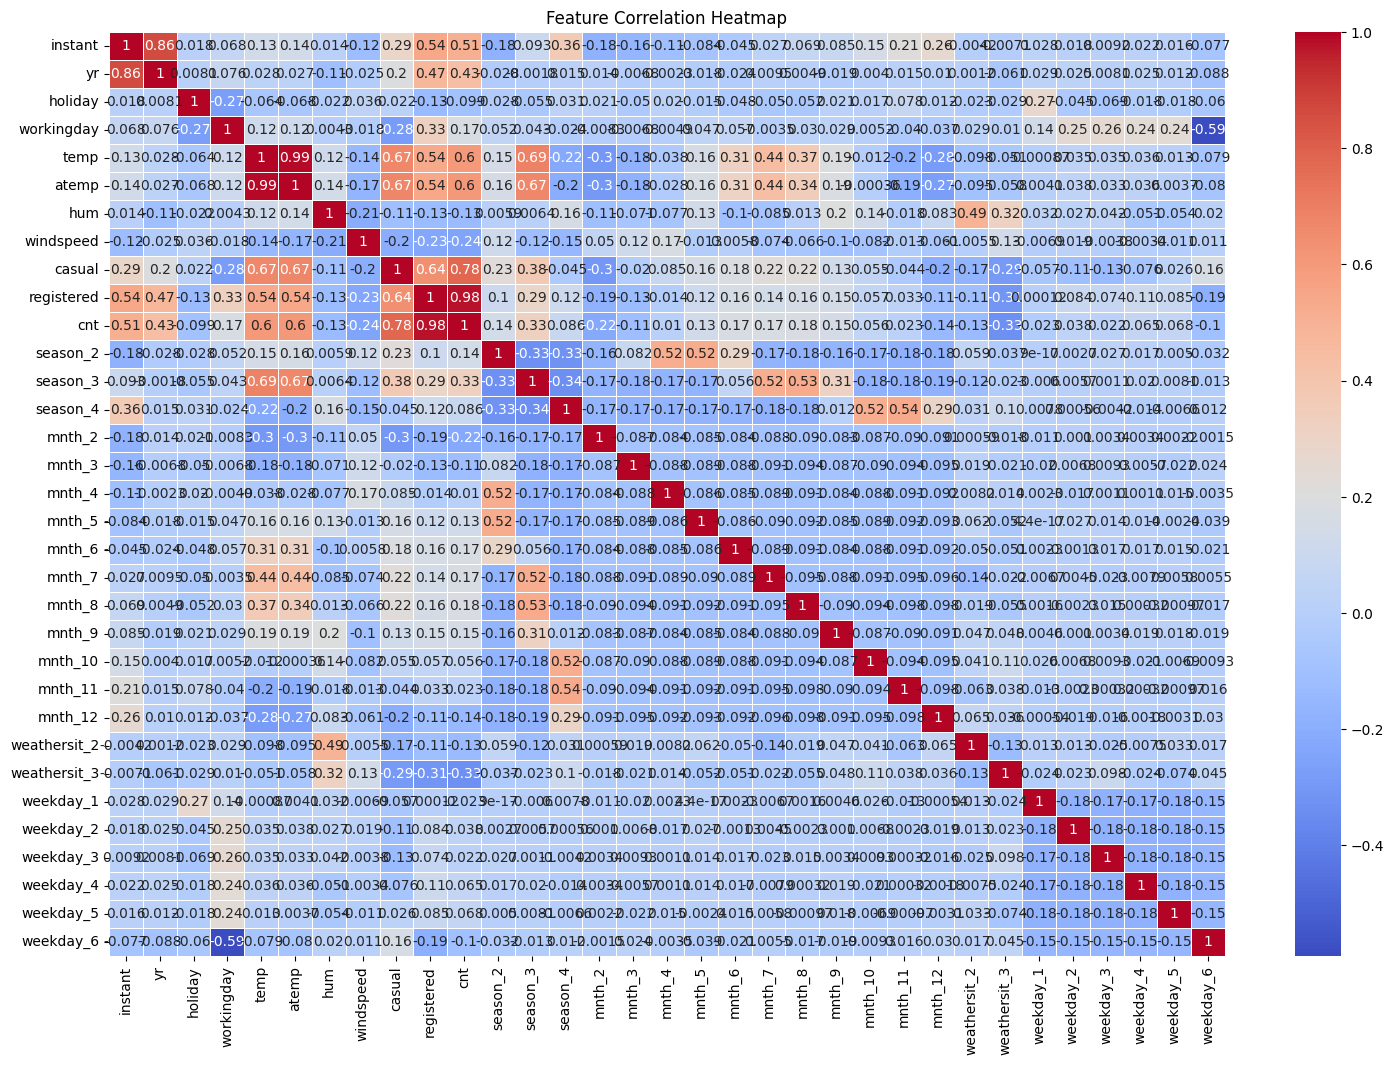

In [68]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(18, 12))
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


#### **Key Observations from the Correlation Heatmap**:
1. **Target Variable (`cnt`) Correlations**:
   - The **`cnt`** (total number of rentals) is **positively correlated** with:
     - **`registered`** (`0.97`): This makes sense because the majority of bike rentals are by registered users.
     - **`temp`** and **`atemp`** (both around `0.63`): This suggests that higher temperatures are associated with higher bike demand.
   - The **`cnt`** variable is **negatively correlated** with:
     - **`windspeed`** (`-0.23`): This indicates that high wind speeds may deter people from renting bikes.

2. **Multicollinearity Concerns**:
   - **`temp`** and **`atemp`** are almost perfectly correlated (`0.99`), which suggests that they essentially represent the same information. We may want to drop one of these features to avoid multicollinearity in our model.
   - **`season_2`**, **`season_3`**, and **`season_4`** are somewhat correlated with each other, but this is expected due to the seasonal cycle.

3. **Feature Importance**:
   - The variables that appear to be the most correlated with the target variable (`cnt`) are:
     - **`registered`**: Strong positive correlation (`0.97`).
     - **`temp`** and **`atemp`**: Moderate positive correlation (`0.63` and `0.63` respectively).
     - **`casual`**: Moderate positive correlation (`0.67`), as it contributes to the total rental count.
   
4. **Actionable Insights for Feature Engineering**:
   - Based on this heatmap, we will consider dropping **`atemp`** (as it is highly correlated with `temp`), to reduce redundancy.
   - Features with lower correlations to `cnt`, such as **`holiday`** and **`workingday`**, have a smaller direct impact, but may still be retained based on the context they provide.
   - We need to be mindful of **multicollinearity** in our model, especially between strongly correlated features like **`temp`** and **`atemp`**.

#### **Next Steps**:
- We will move on to **Step 2: Feature Engineering**, where we will finalize our feature selection based on the insights gained from this heatmap.
- We will create additional features if necessary, and drop any redundant or highly correlated features to ensure our model performs optimally.

The heatmap provided valuable insights into the relationships between our features and the target variable, helping us make informed decisions for feature engineering.